### Kicking horses

A famous early application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by Bortkiewicz in 1898.\
He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). 
He recorded the number of corps with a given number of deaths:\

|Deaths | Groups| 
|---|---|
| 0 | 109 |
| 1 | 65 |
| 2 | 22 | 
| 3 | 3 | 
| 4 | 1 | 

Plot the resulting probability distribution. Careful with the normalization\
How does it look like? Again try to fit it by hand.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [24]:
groups = np.array([109, 65, 22, 3, 1])
deaths = np.arange(0,5,1) 

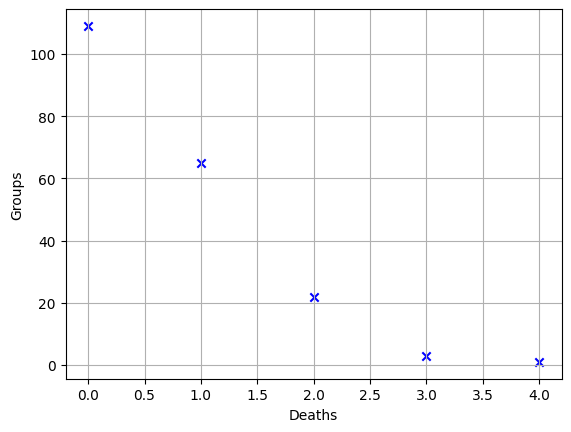

In [25]:
plt.scatter(deaths, groups, marker='x', color='blue', label='Groups')
plt.xlabel('Deaths')
plt.ylabel('Groups')
plt.grid()

In [34]:
mean = 122/groups.sum()
x = poisson(mean)

In [35]:
y = x.rvs(groups.sum())

In [38]:
# Compute histogram
bins = int(np.sqrt(y.size))
counts, bin_edges = np.histogram(y, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
errors = np.sqrt(counts)  # Poisson errors

In [45]:
from scipy.optimize import curve_fit

def poisson_pmf(k, lamb):
    return poisson.pmf(k, lamb) * y.size  # Scale by total number of samples

# Fit Poisson distribution to histogram
popt, pcov = curve_fit(poisson_pmf, bin_centers, counts, p0=[np.mean(deaths)])

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ricca\AppData\Local\Temp\ipykernel_12456\1036165812.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='orange', capsize=3, label='Poisson Errors = $\sqrt{N}$')


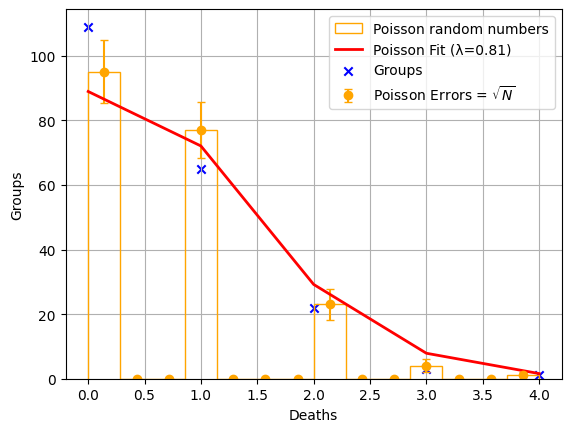

In [50]:
# Plot histogram with errors
plt.hist(y, bins, histtype='step', color='orange', label='Poisson random numbers')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='orange', capsize=3, label='Poisson Errors = $\sqrt{N}$')
x_fit = np.arange(deaths.min(), deaths.max() + 1)
plt.plot(x_fit, poisson_pmf(x_fit, *popt), 'r-', label=f'Poisson Fit (λ={popt[0]:.2f})', linewidth=2)
# Plot scatter points
plt.scatter(deaths, groups, marker='x', color='blue', label='Groups')

# Labels, grid, and legend
plt.xlabel('Deaths')
plt.ylabel('Groups')
plt.grid()
plt.legend()
plt.show()
